In [1]:
import pandas as pd
import numpy as np
import xlwings as xw
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
#ws에서 읽은 데이터를 DF 형식으로 바꿔주는 함수

def wsValtoDf(li : list):
    lines = li
    col_length = len(lines[0])
    columns = lines.pop(0)
    res_lists = []
    
    for _ in range(col_length):
        res_lists.append([])
    
    for line in lines:
        for i, j in enumerate(line):
            res_lists[i].append(j)
    
    df = pd.DataFrame()
    
    
    for col_name, data in zip(columns, res_lists):
        df[col_name] = data
        
    return df

In [3]:
#fitting을 위한 함수
def func_powerlaw(x, m, b, a):
    return a + x**m * b

def func_exp(x, a, b, c):
    return a + np.exp(b*x) * c

In [4]:
df = pd.read_excel('melon_weekly_top100_200501-202322.xlsx')
df

,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
0,200501,20050103-20050109,1,623250,보통날,발라드,100007,god,그룹|남성,43691,보통날
1,200501,20050103-20050109,2,631232,둘이서 (CF - 빙그레 '바나나맛 우유'),댄스,41894,채연,솔로|여성,44462,Virginalness Bloom
2,200501,20050103-20050109,3,642420,겨울일기,발라드,10575,장나라,솔로|여성,45305,나의 이야기
3,200501,20050103-20050109,4,623157,빙고,댄스,100022,코요태,그룹|혼성,43648,Rainbow 7집
4,200501,20050103-20050109,5,622912,헤어지자고 (MBC 슬픈연가 삽입곡),발라드,14801,윤건,솔로|남성,43532,Now Is.. 2집
...,...,...,...,...,...,...,...,...,...,...,...
95984,202322,20230529-20230604,96,35008528,A bientot,랩/힙합,994944,임영웅,솔로|남성,10923444,IM HERO
95985,202322,20230529-20230604,97,31666417,주저하는 연인들을 위해,"인디음악, 록/메탈",772253,잔나비,그룹|남성,10260858,전설
95986,202322,20230529-20230604,98,35668899,딱 10CM만,R&B/Soul,468244|2744750,10CM|BIG Naughty (서동현),프로젝트,11063205,딱 10CM만
95987,202322,20230529-20230604,99,36294584,너를 보는게 지친 하루에,발라드,722098,송하예,솔로|여성,11205854,너를 보는게 지친 하루에


In [318]:
df[(df['artist_name'] == 'NMIXX') & (df['song_name'] == 'Love Me Like This' )]

,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
94970,202312,20230320-20230326,82,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95016,202313,20230327-20230402,28,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95102,202314,20230403-20230409,14,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95196,202315,20230410-20230416,8,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95298,202316,20230417-20230423,10,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95404,202317,20230424-20230430,16,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95512,202318,20230501-20230507,24,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95614,202319,20230508-20230514,26,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95721,202320,20230515-20230521,33,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo
95824,202321,20230522-20230528,36,36266615,Love Me Like This,댄스,3070786,NMIXX,그룹|여성,11201031,expérgo


In [108]:
girlgroup_chart = df[df['artist_activity_type']== '그룹|여성']
for i in set(girlgroup_chart['artist_name']):
    print(i)

미녀삼총사
퍼퓸
스윙
레인보우 블랙
7 go up
PRISTIN (프리스틴)
Pinkrush
2YOON (포미닛 투윤)
원더걸스
H7美人-The b
아이오아이 (I.O.I)
에이시아
더러쉬 (The Lush)
LE SSERAFIM (르세라핌)
소녀시대-Oh!GG
주비스
WSG워너비 조별경연 (대청봉)
애프터스쿨
러블리즈
WSG워너비(4FIRE)
Apink (에이핑크)
Tender Love
애프터스쿨 BLUE
빅마마
WSG워너비
아이비아이 (I.B.I)
유유 (YouU)
15& (박지민, 백예린)
퀸즈
TWICE (트와이스)
천상지희 다나&선데이
천상지희 더 그레이스 (The Grace)
2보람
스텔라
레인보우
쉬즈
경서예지
쇼콜라
Eye To Eye
포투모로우
디바
가비 퀸즈
환불원정대
헬로비너스
브랜뉴데이
미쓰에이
Ab 에비뉴
시크릿
카라
Nep
키로츠
몽실이 시스터즈
초콜릿
M&N (미료&나르샤)
LA.G
BLACKPINK
스피카
화려강산
WSG워너비 (가야G)
맥시붐
미지
달샤벳
무한걸스
여자친구 (GFRIEND)
언프리티 랩스타 2
IVE (아이브)
우먼파워
다비치
WSG워너비 (오아시소)
프로미스나인
브라운아이드걸스
GOT the beat
Apink BnN (보미,남주)
솔지하니 (EXID)
아이리스
미쓰리
제이큐티
티티마
HI SUHYUN
디유닛
씨리얼
H2가인
gavy project H5애인
레드벨벳-아이린&슬기
LPG
에이프릴 (APRIL)
티아라
바이걸
AOA CREAM
NewJeans
루싸이트 토끼
비너스
카사n노바
지피베이직
2NE1
더 씨야
FIFTY FIFTY
한스 밴드
SummerWish
애프터스쿨 RED
4minute
AOA
가디스
모모랜드 (MOMOLAND)
F-ve Dolls
브레이브걸스
제이레빗(J Rabbit)
H1-KEY (하이키)
BGM
베스티
NMIXX
멜로디데이 (MelodyDay)
소녀시대 (GIRLS' GENERATION)
f(x)
S.T.Child
타히티
미미시스터즈
짜리몽땅
걸 프렌즈
씨야
써니데이즈
S.E.S.

In [240]:
girlgroup_chart[girlgroup_chart['artist_name']== ('다비치')]['yearweek'].drop_duplicates()

15978    200805
16047    200806
16132    200807
16227    200808
16324    200809
          ...  
92372    202238
92477    202239
92582    202240
92685    202241
93674    202251
Name: yearweek, Length: 469, dtype: int64

In [148]:
#여기부터는 읽은 데이터를 fitting

In [269]:
wb = xw.books.active
wb.name
ws = wb.sheets.active
ws.name

'Sheet2'

In [118]:
girlgroup_ranker = girlgroup_chart.groupby('artist_name')['ranking'].count().sort_values(ascending=False).reset_index()

In [119]:
ws["A1"].value = girlgroup_ranker

In [143]:
l1 = ws["A1"].expand().value
l1

[['artist_name', 'ranking'],
 ['TWICE (트와이스)', 594.0],
 ["소녀시대 (GIRLS' GENERATION)", 586.0],
 ['BLACKPINK', 565.0],
 ['2NE1', 531.0],
 ['Red Velvet (레드벨벳)', 472.0],
 ['마마무 (Mamamoo)', 440.0],
 ['원더걸스', 413.0],
 ['브라운아이드걸스', 369.0],
 ['씨스타', 347.0],
 ['Apink (에이핑크)', 295.0],
 ['티아라', 285.0],
 ['오마이걸 (OH MY GIRL)', 280.0],
 ['여자친구 (GFRIEND)', 272.0],
 ['카라', 269.0],
 ['(여자)아이들', 256.0],
 ['aespa', 253.0],
 ['4minute', 241.0],
 ['걸스데이', 222.0],
 ['AOA', 220.0],
 ['f(x)', 202.0],
 ['IVE (아이브)', 191.0],
 ['쥬얼리', 188.0],
 ['NewJeans', 177.0],
 ['브레이브걸스', 171.0],
 ['ITZY (있지)', 166.0],
 ['애프터스쿨', 161.0],
 ['EXID', 158.0],
 ['시크릿', 157.0],
 ['미쓰에이', 152.0],
 ['오렌지 캬라멜', 129.0],
 ['IZ*ONE (아이즈원)', 122.0],
 ['STAYC(스테이씨)', 122.0],
 ['아이오아이 (I.O.I)', 122.0],
 ['써니힐', 104.0],
 ['달샤벳', 99.0],
 ['레인보우', 92.0],
 ['LE SSERAFIM (르세라핌)', 89.0],
 ['미스에스', 79.0],
 ['러블리즈', 78.0],
 ['레이디스 코드', 78.0],
 ['버블 시스터즈', 75.0],
 ['나인뮤지스', 74.0],
 ["소녀시대-태티서 (Girls' Generation-TTS)", 62.0],
 ['모모랜드 (MOMOLAND)', 62.

In [145]:
ranker_df = wsValtoDf(l1)
ranker_df

,artist_name,ranking
0,TWICE (트와이스),594.0
1,소녀시대 (GIRLS' GENERATION),586.0
2,BLACKPINK,565.0
3,2NE1,531.0
4,Red Velvet (레드벨벳),472.0
...,...,...
187,S.T.Child,1.0
188,Nep,1.0
189,짜리몽땅,1.0
190,송크라이걸즈,1.0


0.16487908805030116 -331.0337697607886 733.0885431912001


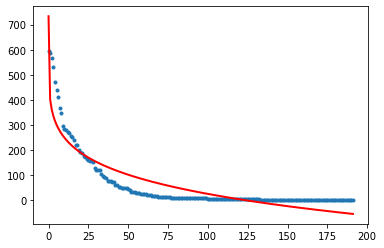

In [233]:
#fitting
target_func = func_powerlaw
#target_func = func_exp

#x = np.arange(100)
x = np.array(list(ranker_df.index))
y = ranker_df['ranking']

popt, pcov = curve_fit(target_func, x, y)
# popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x, y)
m = popt[0]
b = popt[1]
a = popt[2]
print(m,b,a)

# Create the fitted curve
# x_fitted = np.linspace(np.min(x), np.max(x))
# y_fitted = a * np.exp(b * x_fitted) + c

plt.scatter(x, y, marker='.')
plt.plot(x, target_func(x, *popt), color='red', linewidth=2)
plt.show()


# Plot
# ax = plt.axes()
# ax.scatter(x, y, label='Raw data')
# ax.plot(x_fitted, y_fitted, label='Fitted curve')
# ax.set_ylabel('y-Values')
# ax.set_ylim(0, 500)
# ax.set_xlabel('x-Values')
# ax.legend()



# plt.figure(figsize=(10, 5))
# plt.plot(x, target_func(x, *popt), '--')
# plt.plot(x, y, 'ro')
# plt.legend()
# plt.show()

In [208]:
print(x_fitted)
print(y_fitted)

[  0.           3.89795918   7.79591837  11.69387755  15.59183673
  19.48979592  23.3877551   27.28571429  31.18367347  35.08163265
  38.97959184  42.87755102  46.7755102   50.67346939  54.57142857
  58.46938776  62.36734694  66.26530612  70.16326531  74.06122449
  77.95918367  81.85714286  85.75510204  89.65306122  93.55102041
  97.44897959 101.34693878 105.24489796 109.14285714 113.04081633
 116.93877551 120.83673469 124.73469388 128.63265306 132.53061224
 136.42857143 140.32653061 144.2244898  148.12244898 152.02040816
 155.91836735 159.81632653 163.71428571 167.6122449  171.51020408
 175.40816327 179.30612245 183.20408163 187.10204082 191.        ]
[2.42851352e+58 2.42851352e+58 2.42851352e+58 2.42851352e+58
 2.42851352e+58 2.42851352e+58 2.42851352e+58 2.42851352e+58
 2.42851352e+58 2.42851352e+58 2.42851352e+58 2.42851352e+58
 2.42851352e+58 2.42851352e+58 2.42851352e+58 2.42851352e+58
 2.42851352e+58 2.42851352e+58 2.42851352e+58 2.42851352e+58
 2.42851352e+58 2.42851352e+58 2.4

In [20]:
#pdf2['count']['ranking'].sort_values(ascending=False)

artist_name
방탄소년단             2649
아이유               2351
BIGBANG (빅뱅)      1264
EXO               1127
임영웅               1118
                  ... 
유빈                   1
유승우|유연정 (우주소녀)       1
YDG|스컬               1
유정란 (유세윤 & 이정)       1
히트                   1
Name: ranking, Length: 2742, dtype: int64

In [10]:
consecutive_rank_dic = {}

In [5]:
top1_df = df[df['ranking'] == 1]
top1_artists_ordered = list(top1_df['artist_name'])
top1_artists = list(set(top1_artists_ordered))
top1_artists_ordered
only_girlgroups = top1_df[top1_df[top1_df['artist_name'].isin(list(consecutive_rank_dic.keys()))]['artist_activity_type'] == '그룹|여성']['artist_name']
only_girlgroups = list(set(only_girlgroups))
only_girlgroups

NameError: name 'consecutive_rank_dic' is not defined

In [282]:
top1_df[top1_df['artist_name'].isin(list(consecutive_rank_dic.keys())[:137])][['song_name', 'artist_name']].drop_duplicates()
wb = xw.books.active
wb.name
ws = wb.sheets.active
ws.name
ws["A1"].value = top1_df[top1_df['artist_name'].isin(list(consecutive_rank_dic.keys())[:137])][['song_name', 'artist_name']].drop_duplicates()

In [300]:
wb = xw.books.active
wb.name
ws = wb.sheets.active
ws.name

'Sheet4'

In [302]:
ws["A1"].value = top1_df

In [287]:
for _ in consecutive_rank_dic.keys():
    test4 = top1_df[top1_df['artist_name'] == _]
    display(test4[test4['artist_activity_type']=='그룹|여성'])

,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
91789,202233,20220815-20220821,1,35454425,Attention,댄스,3114174,NewJeans,그룹|여성,11011565,NewJeans 1st EP 'New Jeans'
91889,202234,20220822-20220828,1,35454425,Attention,댄스,3114174,NewJeans,그룹|여성,11011565,NewJeans 1st EP 'New Jeans'
93589,202251,20221219-20221225,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
93689,202252,20221226-20230101,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
93789,202301,20230102-20230108,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
93889,202302,20230109-20230115,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
93989,202303,20230116-20230122,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
94089,202304,20230123-20230129,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
94189,202305,20230130-20230205,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'
94289,202306,20230206-20230212,1,35945927,Ditto,댄스,3114174,NewJeans,그룹|여성,11127145,NewJeans 'OMG'


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
20923,200903,20090111-20090117,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21023,200904,20090118-20090124,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21123,200905,20090125-20090131,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21223,200906,20090201-20090207,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21323,200907,20090208-20090214,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21423,200908,20090215-20090221,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21523,200909,20090222-20090228,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
21623,200910,20090301-20090307,1,2012282,Gee,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,458355,The First Mini Album 'Gee'
23323,200927,20090628-20090704,1,2203097,소원을 말해봐 (Genie),댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,590853,'소원을 말해봐 (Genie)' The Second Mini Album
26320,201004,20100124-20100130,1,2554001,Oh!,댄스,228069,소녀시대 (GIRLS' GENERATION),그룹|여성,779656,'Oh!' The Second Album


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
14323,200741,20071007-20071013,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14423,200742,20071014-20071020,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14523,200743,20071021-20071027,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14623,200744,20071028-20071103,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14723,200745,20071104-20071110,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14823,200746,20071111-20071117,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
14923,200747,20071118-20071124,1,1724693,Tell me (Sampling From 'Two Of Hearts'),댄스,217764,원더걸스,그룹|여성,357386,The Wonder Years
17623,200822,20080525-20080531,1,1874397,So Hot,댄스,217764,원더걸스,그룹|여성,381932,So Hot
17723,200823,20080601-20080607,1,1874397,So Hot,댄스,217764,원더걸스,그룹|여성,381932,So Hot
17823,200824,20080608-20080614,1,1874397,So Hot,댄스,217764,원더걸스,그룹|여성,381932,So Hot


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
7424,200624,20060612-20060618,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
7523,200625,20060619-20060625,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
7623,200626,20060626-20060702,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
7723,200627,20060703-20060709,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
7823,200628,20060710-20060716,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
7923,200629,20060717-20060723,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]
8023,200630,20060724-20060730,1,1213524,LOVE ALL,발라드,186813,gavy nj project group [H7美人(미인)],그룹|여성,319770,gavy nj project group [H7美人(미인)]


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
84289,202110,20210308-20210314,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
84389,202111,20210315-20210321,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
84489,202112,20210322-20210328,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
84789,202115,20210412-20210418,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
84889,202116,20210419-20210425,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
84989,202117,20210426-20210502,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
85089,202118,20210503-20210509,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
85189,202119,20210510-20210516,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'
85289,202120,20210517-20210523,1,30287019,롤린 (Rollin'),댄스,531700,브레이브걸스,그룹|여성,10043575,Rollin'


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
91289,202228,20220711-20220717,1,35383397,그때 그 순간 그대로 (그그그),발라드,3110856,WSG워너비 (가야G),그룹|여성,11000171,WSG워너비 1집
91389,202229,20220718-20220724,1,35383397,그때 그 순간 그대로 (그그그),발라드,3110856,WSG워너비 (가야G),그룹|여성,11000171,WSG워너비 1집
91489,202230,20220725-20220731,1,35383397,그때 그 순간 그대로 (그그그),발라드,3110856,WSG워너비 (가야G),그룹|여성,11000171,WSG워너비 1집
91589,202231,20220801-20220807,1,35383397,그때 그 순간 그대로 (그그그),발라드,3110856,WSG워너비 (가야G),그룹|여성,11000171,WSG워너비 1집
91689,202232,20220808-20220814,1,35383397,그때 그 순간 그대로 (그그그),발라드,3110856,WSG워너비 (가야G),그룹|여성,11000171,WSG워너비 1집


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
25523,200949,20091129-20091205,1,2366796,너 때문에,댄스,322666,애프터스쿨,그룹|여성,723759,너 때문에
25623,200950,20091206-20091212,1,2366796,너 때문에,댄스,322666,애프터스쿨,그룹|여성,723759,너 때문에
25723,200951,20091213-20091219,1,2366796,너 때문에,댄스,322666,애프터스쿨,그룹|여성,723759,너 때문에
25823,200952,20091220-20091226,1,2366796,너 때문에,댄스,322666,애프터스쿨,그룹|여성,723759,너 때문에
27219,201013,20100328-20100403,1,2621364,뱅(Bang) !,댄스,322666,애프터스쿨,그룹|여성,838454,Bang!


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
58889,201617,20160425-20160501,1,8158031,CHEER UP,댄스,905701,TWICE (트와이스),그룹|여성,2681333,PAGE TWO
58989,201618,20160502-20160508,1,8158031,CHEER UP,댄스,905701,TWICE (트와이스),그룹|여성,2681333,PAGE TWO
59089,201619,20160509-20160515,1,8158031,CHEER UP,댄스,905701,TWICE (트와이스),그룹|여성,2681333,PAGE TWO
59189,201620,20160516-20160522,1,8158031,CHEER UP,댄스,905701,TWICE (트와이스),그룹|여성,2681333,PAGE TWO
61489,201643,20161024-20161030,1,30054344,TT,댄스,905701,TWICE (트와이스),그룹|여성,10008861,TWICEcoaster : LANE 1
61589,201644,20161031-20161106,1,30054344,TT,댄스,905701,TWICE (트와이스),그룹|여성,10008861,TWICEcoaster : LANE 1
61689,201645,20161107-20161113,1,30054344,TT,댄스,905701,TWICE (트와이스),그룹|여성,10008861,TWICEcoaster : LANE 1
61789,201646,20161114-20161120,1,30054344,TT,댄스,905701,TWICE (트와이스),그룹|여성,10008861,TWICEcoaster : LANE 1
63189,201708,20170220-20170226,1,30261007,KNOCK KNOCK,댄스,905701,TWICE (트와이스),그룹|여성,10040060,TWICEcoaster : LANE 2
63289,201709,20170227-20170305,1,30261007,KNOCK KNOCK,댄스,905701,TWICE (트와이스),그룹|여성,10040060,TWICEcoaster : LANE 2


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
28615,201027,20100704-20100710,1,2741416,Bad Girl Good Girl,댄스,481481,미쓰에이,그룹|여성,941952,Bad But Good
28715,201028,20100711-20100717,1,2741416,Bad Girl Good Girl,댄스,481481,미쓰에이,그룹|여성,941952,Bad But Good
28815,201029,20100718-20100724,1,2741416,Bad Girl Good Girl,댄스,481481,미쓰에이,그룹|여성,941952,Bad But Good
28915,201030,20100725-20100731,1,2741416,Bad Girl Good Girl,댄스,481481,미쓰에이,그룹|여성,941952,Bad But Good
34098,201130,20110724-20110730,1,3488849,Good-bye Baby,댄스,481481,미쓰에이,그룹|여성,1339951,A Class
37098,201208,20120219-20120225,1,3713013,Touch,댄스,481481,미쓰에이,그룹|여성,2082826,Touch
53291,201514,20150330-20150405,1,5644636,다른 남자 말고 너,댄스,481481,미쓰에이,그룹|여성,2311419,Colors
53391,201515,20150406-20150412,1,5644636,다른 남자 말고 너,댄스,481481,미쓰에이,그룹|여성,2311419,Colors


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
60389,201632,20160808-20160814,1,8304594,휘파람,랩/힙합,995169,BLACKPINK,그룹|여성,2703168,SQUARE ONE
60489,201633,20160815-20160821,1,8304594,휘파람,랩/힙합,995169,BLACKPINK,그룹|여성,2703168,SQUARE ONE
70089,201825,20180618-20180624,1,31131273,뚜두뚜두 (DDU-DU DDU-DU),랩/힙합,995169,BLACKPINK,그룹|여성,10176415,SQUARE UP
70189,201826,20180625-20180701,1,31131273,뚜두뚜두 (DDU-DU DDU-DU),랩/힙합,995169,BLACKPINK,그룹|여성,10176415,SQUARE UP
70289,201827,20180702-20180708,1,31131273,뚜두뚜두 (DDU-DU DDU-DU),랩/힙합,995169,BLACKPINK,그룹|여성,10176415,SQUARE UP
70389,201828,20180709-20180715,1,31131273,뚜두뚜두 (DDU-DU DDU-DU),랩/힙합,995169,BLACKPINK,그룹|여성,10176415,SQUARE UP
80689,202027,20200629-20200705,1,32720013,How You Like That,댄스,995169,BLACKPINK,그룹|여성,10451566,How You Like That
80789,202028,20200706-20200712,1,32720013,How You Like That,댄스,995169,BLACKPINK,그룹|여성,10451566,How You Like That
80889,202029,20200713-20200719,1,32720013,How You Like That,댄스,995169,BLACKPINK,그룹|여성,10451566,How You Like That


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
57689,201605,20160201-20160207,1,8028701,시간을 달려서 (Rough),댄스,828478,여자친구 (GFRIEND),그룹|여성,2663668,여자친구 3rd Mini Album 'SNOWFLAKE'
57789,201606,20160208-20160214,1,8028701,시간을 달려서 (Rough),댄스,828478,여자친구 (GFRIEND),그룹|여성,2663668,여자친구 3rd Mini Album 'SNOWFLAKE'
57889,201607,20160215-20160221,1,8028701,시간을 달려서 (Rough),댄스,828478,여자친구 (GFRIEND),그룹|여성,2663668,여자친구 3rd Mini Album 'SNOWFLAKE'
57989,201608,20160222-20160228,1,8028701,시간을 달려서 (Rough),댄스,828478,여자친구 (GFRIEND),그룹|여성,2663668,여자친구 3rd Mini Album 'SNOWFLAKE'


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
90989,202225,20220620-20220626,1,34847378,LOVE DIVE,댄스,3055146,IVE (아이브),그룹|여성,10909179,LOVE DIVE
91089,202226,20220627-20220703,1,34847378,LOVE DIVE,댄스,3055146,IVE (아이브),그룹|여성,10909179,LOVE DIVE
91189,202227,20220704-20220710,1,34847378,LOVE DIVE,댄스,3055146,IVE (아이브),그룹|여성,10909179,LOVE DIVE
91989,202235,20220829-20220904,1,35546497,After LIKE,댄스,3055146,IVE (아이브),그룹|여성,11034298,After LIKE
92089,202236,20220905-20220911,1,35546497,After LIKE,댄스,3055146,IVE (아이브),그룹|여성,11034298,After LIKE
92189,202237,20220912-20220918,1,35546497,After LIKE,댄스,3055146,IVE (아이브),그룹|여성,11034298,After LIKE
92289,202238,20220919-20220925,1,35546497,After LIKE,댄스,3055146,IVE (아이브),그룹|여성,11034298,After LIKE
94989,202313,20230327-20230402,1,36318125,Kitsch,댄스,3055146,IVE (아이브),그룹|여성,11211297,I've IVE
95089,202314,20230403-20230409,1,36318125,Kitsch,댄스,3055146,IVE (아이브),그룹|여성,11211297,I've IVE
95189,202315,20230410-20230416,1,36318125,Kitsch,댄스,3055146,IVE (아이브),그룹|여성,11211297,I've IVE


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
18323,200829,20080713-20080719,1,1897011,사랑과 전쟁 (Narr. 하하),댄스,236815,다비치,그룹|여성,388456,Vivid Summer Edition (1st Amaranth Repackage A...
21723,200911,20090308-20090314,1,2093360,8282,댄스,236815,다비치,그룹|여성,508460,Davichi In Wonderland
21823,200912,20090315-20090321,1,2093360,8282,댄스,236815,다비치,그룹|여성,508460,Davichi In Wonderland
21923,200913,20090322-20090328,1,2093360,8282,댄스,236815,다비치,그룹|여성,508460,Davichi In Wonderland
22023,200914,20090329-20090404,1,2093360,8282,댄스,236815,다비치,그룹|여성,508460,Davichi In Wonderland
27817,201019,20100509-20100515,1,2670748,시간아 멈춰라,댄스,236815,다비치,그룹|여성,880151,Innocence
34798,201137,20110911-20110917,1,3536905,안녕이라고 말하지마,발라드,236815,다비치,그룹|여성,2008890,Love Delight
36998,201207,20120212-20120218,1,3699257,생각날거야,발라드,236815,다비치,그룹|여성,2076258,LOVE CALL (With 다비치)
42491,201310,20130304-20130310,1,4047160,거북이,발라드,236815,다비치,그룹|여성,2176844,Mystic Ballad Part.1
42891,201314,20130401-20130407,1,4072715,녹는 중 (Feat. 버벌진트),발라드,236815,다비치,그룹|여성,2179893,녹는 중


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
16123,200807,20080210-20080216,1,1788174,Love,댄스,181694,브라운아이드걸스,그룹|여성,362984,With L.O.V.E Brown Eyed Girls
16223,200808,20080217-20080223,1,1788174,Love,댄스,181694,브라운아이드걸스,그룹|여성,362984,With L.O.V.E Brown Eyed Girls
16323,200809,20080224-20080301,1,1788174,Love,댄스,181694,브라운아이드걸스,그룹|여성,362984,With L.O.V.E Brown Eyed Girls
16423,200810,20080302-20080308,1,1788174,Love,댄스,181694,브라운아이드걸스,그룹|여성,362984,With L.O.V.E Brown Eyed Girls
23823,200932,20090802-20090808,1,2229259,Abracadabra,댄스,181694,브라운아이드걸스,그룹|여성,603751,Sound G.
23923,200933,20090809-20090815,1,2229259,Abracadabra,댄스,181694,브라운아이드걸스,그룹|여성,603751,Sound G.
24023,200934,20090816-20090822,1,2229259,Abracadabra,댄스,181694,브라운아이드걸스,그룹|여성,603751,Sound G.
34998,201139,20110925-20111001,1,3557196,Sixth Sense,댄스,181694,브라운아이드걸스,그룹|여성,2013176,Sixth Sense


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
22723,200921,20090517-20090523,1,2160048,Fire,댄스,406712,2NE1,그룹|여성,554651,Fire (Digital Single)
22823,200922,20090524-20090530,1,2160048,Fire,댄스,406712,2NE1,그룹|여성,554651,Fire (Digital Single)
22923,200923,20090531-20090606,1,2160048,Fire,댄스,406712,2NE1,그룹|여성,554651,Fire (Digital Single)
23023,200924,20090607-20090613,1,2160048,Fire,댄스,406712,2NE1,그룹|여성,554651,Fire (Digital Single)
23423,200928,20090705-20090711,1,2212365,I Don't Care,댄스,406712,2NE1,그룹|여성,598055,2NE1 1st Mini Album
23523,200929,20090712-20090718,1,2212365,I Don't Care,댄스,406712,2NE1,그룹|여성,598055,2NE1 1st Mini Album
23623,200930,20090719-20090725,1,2212365,I Don't Care,댄스,406712,2NE1,그룹|여성,598055,2NE1 1st Mini Album
23723,200931,20090726-20090801,1,2212365,I Don't Care,댄스,406712,2NE1,그룹|여성,598055,2NE1 1st Mini Album
29614,201037,20100912-20100918,1,2930967,Can't Nobody,댄스,406712,2NE1,그룹|여성,1017253,To Anyone
29714,201038,20100919-20100925,1,2930968,Go Away,댄스,406712,2NE1,그룹|여성,1017253,To Anyone


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
46991,201403,20140113-20140119,1,4383773,Something,댄스,482762,걸스데이,그룹|여성,2224342,걸스데이 미니앨범 3집
47091,201404,20140120-20140126,1,4383773,Something,댄스,482762,걸스데이,그룹|여성,2224342,걸스데이 미니앨범 3집
47191,201405,20140127-20140202,1,4383773,Something,댄스,482762,걸스데이,그룹|여성,2224342,걸스데이 미니앨범 3집
47291,201406,20140203-20140209,1,4383773,Something,댄스,482762,걸스데이,그룹|여성,2224342,걸스데이 미니앨범 3집


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
42091,201306,20130204-20130210,1,4024692,있다 없으니까 (Gone Not Around Any Longer),댄스,537569,씨스타19,그룹|여성,2174057,있다 없으니까
42191,201307,20130211-20130217,1,4024692,있다 없으니까 (Gone Not Around Any Longer),댄스,537569,씨스타19,그룹|여성,2174057,있다 없으니까
42291,201308,20130218-20130224,1,4024692,있다 없으니까 (Gone Not Around Any Longer),댄스,537569,씨스타19,그룹|여성,2174057,있다 없으니까
42391,201309,20130225-20130303,1,4024692,있다 없으니까 (Gone Not Around Any Longer),댄스,537569,씨스타19,그룹|여성,2174057,있다 없으니까


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
58089,201609,20160229-20160306,1,8068881,넌 is 뭔들,댄스,750053,마마무 (Mamamoo),그룹|여성,2669407,Melting
58189,201610,20160307-20160313,1,8068881,넌 is 뭔들,댄스,750053,마마무 (Mamamoo),그룹|여성,2669407,Melting
58289,201611,20160314-20160320,1,8068881,넌 is 뭔들,댄스,750053,마마무 (Mamamoo),그룹|여성,2669407,Melting
58389,201612,20160321-20160327,1,8068881,넌 is 뭔들,댄스,750053,마마무 (Mamamoo),그룹|여성,2669407,Melting


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
31314,201102,20110109-20110115,1,3089448,샤이보이,댄스,435121,시크릿,그룹|여성,1125351,샤이보이
31514,201104,20110123-20110129,1,3089448,샤이보이,댄스,435121,시크릿,그룹|여성,1125351,샤이보이
31614,201105,20110130-20110205,1,3089448,샤이보이,댄스,435121,시크릿,그룹|여성,1125351,샤이보이
31714,201106,20110206-20110212,1,3089448,샤이보이,댄스,435121,시크릿,그룹|여성,1125351,샤이보이
33398,201123,20110605-20110611,1,3424822,별빛달빛,댄스,435121,시크릿,그룹|여성,1290562,별빛달빛


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
26819,201009,20100228-20100306,1,2587788,너 때문에 미쳐,댄스,412000,티아라,그룹|여성,809262,Breaking Heart (Repackage)
26919,201010,20100307-20100313,1,2587788,너 때문에 미쳐,댄스,412000,티아라,그룹|여성,809262,Breaking Heart (Repackage)
27019,201011,20100314-20100320,1,2587788,너 때문에 미쳐,댄스,412000,티아라,그룹|여성,809262,Breaking Heart (Repackage)
36598,201203,20120115-20120121,1,3663978,Lovey-Dovey,댄스,412000,티아라,그룹|여성,2058067,Funky Town
36698,201204,20120122-20120128,1,3663978,Lovey-Dovey,댄스,412000,티아라,그룹|여성,2058067,Funky Town
36798,201205,20120129-20120204,1,3663978,Lovey-Dovey,댄스,412000,티아라,그룹|여성,2058067,Funky Town


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
30814,201049,20101205-20101211,1,3037051,니까짓게,댄스,473181,씨스타,그룹|여성,1085053,니까짓게
37898,201216,20120415-20120421,1,3763493,나혼자 (Alone),댄스,473181,씨스타,그룹|여성,2107508,ALONE
37998,201217,20120422-20120428,1,3763493,나혼자 (Alone),댄스,473181,씨스타,그룹|여성,2107508,ALONE
38098,201218,20120429-20120505,1,3763493,나혼자 (Alone),댄스,473181,씨스타,그룹|여성,2107508,ALONE
38993,201227,20120701-20120707,1,3837683,Loving U (러빙유),댄스,473181,씨스타,그룹|여성,2131509,Summer Special 'Loving U'
43891,201324,20130610-20130616,1,4138606,Give It To Me,댄스,473181,씨스타,그룹|여성,2188413,Give It To Me
43991,201325,20130617-20130623,1,4138606,Give It To Me,댄스,473181,씨스타,그룹|여성,2188413,Give It To Me
44091,201326,20130624-20130630,1,4138606,Give It To Me,댄스,473181,씨스타,그룹|여성,2188413,Give It To Me
49691,201430,20140721-20140727,1,4756304,Touch My Body,댄스,473181,씨스타,그룹|여성,2268221,TOUCH N MOVE
49791,201431,20140728-20140803,1,4756304,Touch My Body,댄스,473181,씨스타,그룹|여성,2268221,TOUCH N MOVE


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
89689,202212,20220321-20220327,1,34754292,TOMBOY,록/메탈,2137482,(여자)아이들,그룹|여성,10890384,I NEVER DIE
89789,202213,20220328-20220403,1,34754292,TOMBOY,록/메탈,2137482,(여자)아이들,그룹|여성,10890384,I NEVER DIE
90889,202224,20220613-20220619,1,34754292,TOMBOY,록/메탈,2137482,(여자)아이들,그룹|여성,10890384,I NEVER DIE
92689,202242,20221017-20221023,1,35730562,Nxde,댄스,2137482,(여자)아이들,그룹|여성,11078852,I love
92789,202243,20221024-20221030,1,35730562,Nxde,댄스,2137482,(여자)아이들,그룹|여성,11078852,I love
92889,202244,20221031-20221106,1,35730562,Nxde,댄스,2137482,(여자)아이들,그룹|여성,11078852,I love


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
82189,202042,20201012-20201018,1,32978341,DON'T TOUCH ME,댄스,2895619,환불원정대,그룹|여성,10501191,DON'T TOUCH ME
82289,202043,20201019-20201025,1,32978341,DON'T TOUCH ME,댄스,2895619,환불원정대,그룹|여성,10501191,DON'T TOUCH ME


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
43491,201320,20130513-20130519,1,4099280,이름이 뭐예요?,댄스,417985,4minute,그룹|여성,2183128,Name Is 4minute
43591,201321,20130520-20130526,1,4099280,이름이 뭐예요?,댄스,417985,4minute,그룹|여성,2183128,Name Is 4minute


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
51991,201501,20141229-20150104,1,4840271,위아래,댄스,630454,EXID,그룹|여성,2277372,위아래
52091,201502,20150105-20150111,1,4840271,위아래,댄스,630454,EXID,그룹|여성,2277372,위아래


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
16523,200811,20080309-20080315,1,1807098,One More Time,댄스,101487,쥬얼리,그룹|여성,368317,5집 Kitchi Island
16623,200812,20080316-20080322,1,1807098,One More Time,댄스,101487,쥬얼리,그룹|여성,368317,5집 Kitchi Island


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
61389,201642,20161017-20161023,1,30040810,너무너무너무,댄스,960251,아이오아이 (I.O.I),그룹|여성,10006841,miss me?


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
51591,201449,20141201-20141207,1,5473905,LUV,댄스,534360,Apink (에이핑크),그룹|여성,2291986,Pink LUV


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
26719,201008,20100221-20100227,1,2579459,루팡 (Lupin),댄스,222128,카라,그룹|여성,802252,루팡 (Lupin)


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
51291,201446,20141110-20141116,1,5456526,나는 달라 (Feat. BOBBY),R&B/Soul,789978,HI SUHYUN,그룹|여성,2290103,나는 달라


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
32700,201116,20110417-20110423,1,3366160,피노키오 (Danger),댄스,428501,f(x),그룹|여성,1248368,'피노키오' f(x) The 1st Album
33598,201125,20110619-20110625,1,3440448,Hot Summer,댄스,428501,f(x),그룹|여성,1306051,'Hot Summer' f(x) 1st Album Repackage
38694,201224,20120610-20120616,1,3822622,Electric Shock,댄스,428501,f(x),그룹|여성,2126375,'Electric Shock' The 2nd Mini Album
44591,201331,20130729-20130804,1,4184826,첫 사랑니 (Rum Pum Pum Pum),댄스,428501,f(x),그룹|여성,2194266,'Pink Tape' f(x) The 2nd Album


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
12923,200727,20070702-20070708,1,1645081,사랑의 인사,발라드,181679,씨야,그룹|여성,352046,Lovely Sweetheart


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
70789,201832,20180806-20180812,1,31230093,Power Up,댄스,780066,Red Velvet (레드벨벳),그룹|여성,10191694,Summer Magic - Summer Mini Album


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name
85789,202125,20210621-20210627,1,33487342,Next Level,댄스,2899555,aespa,그룹|여성,10609232,Next Level
87389,202141,20211011-20211017,1,34041584,Savage,댄스,2899555,aespa,그룹|여성,10731792,Savage - The 1st Mini Album


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


,yearweek,period,ranking,song_id,song_name,song_genre,artist_id,artist_name,artist_activity_type,album_id,album_name


In [260]:
top1_df = df[df['ranking'] == 1]
test1 = top1_df[top1_df['artist_activity_type'] == '그룹|여성']['artist_name']
test1 = list(set(test1))
len(test1)

34

In [289]:
top1_artists_ordered

['god',
 'god',
 'god',
 '채연',
 '나얼',
 '테이',
 '테이',
 '테이',
 '테이',
 '테이',
 '버즈',
 '버즈',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 '윤도현',
 '윤도현',
 '윤도현',
 '윤도현',
 '윤도현',
 '윤도현',
 '윤도현',
 '윤도현',
 'KCM',
 'KCM',
 '김종국',
 '김종국',
 '김종국',
 '김종국',
 '김종국',
 '김종국',
 '김종국',
 '김종국',
 '엠투엠 (M To M)',
 '엠투엠 (M To M)',
 '엠투엠 (M To M)',
 '엠투엠 (M To M)',
 '엠투엠 (M To M)',
 '에픽하이 (EPIK HIGH)',
 '에픽하이 (EPIK HIGH)',
 '에픽하이 (EPIK HIGH)',
 '에픽하이 (EPIK HIGH)',
 '에픽하이 (EPIK HIGH)',
 '버즈',
 '버즈',
 '버즈',
 '버즈',
 '버즈',
 '버즈',
 'Big4',
 'Big4',
 'Big4',
 'Big4',
 'Big4',
 '이승기',
 '이승기',
 '이승기',
 '이승기',
 '이승기',
 '바이브',
 '바이브',
 '바이브',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 'SG 워너비',
 '백지영',
 '백지영',
 '백지영',
 '버즈',
 '버즈',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 'gavy nj project group [H7美人(미인)]',
 '거북이',
 '

In [11]:
for artist in top1_artists:
    max_list = []
    val = 0
    for period in top1_artists_ordered:
        if artist == period:
            val = val + 1
            
        if artist == top1_artists_ordered[-1]:
            max_list.append(val)
            
        else:
            if val > 0:
                max_list.append(val)
                val = 0
    print(artist, max_list)
    
    consecutive_rank_dic[artist] = max(max_list)
            
    

김나영 [1, 1, 1]
박보람 [1, 1]
박지헌 [1, 1, 1]
가인 [1]
소유 (SOYOU)|권순일 (어반자카파)|박용인 (어반자카파) [1]
김종국|SG 워너비 [1, 1, 1, 1]
쥬얼리 [1, 1]
볼빨간사춘기 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
황광희 X 개코 [1]
성시경|박효신|서인국|VIXX (빅스)|여동생 [1]
MINO (송민호) [1, 1]
정키 [1]
양파 [1, 1, 1, 1, 1, 1]
거머리 (박명수 & 프라이머리) [1]
걸스데이 [1, 1, 1, 1]
우원재 [1, 1]
NewJeans [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
염따|딥플로우|팔로알토 (Paloalto)|The Quiett|사이먼 도미닉 [1]
가호 (Gaho) [1, 1]
브라운아이드걸스 [1, 1, 1, 1, 1, 1, 1, 1]
로이킴 [1, 1, 1]
로꼬 [1]
창모 (CHANGMO) [1, 1, 1]
iKON [1, 1, 1, 1, 1, 1, 1]
방탄소년단 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
정용화 (CNBLUE) [1]
엠씨더맥스 (M.C the MAX) [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
브라운 아이즈 [1]
송지은 [1, 1]
BewhY (비와이) [1, 1]
aespa [1, 1, 1]
sokodomo [1]
닐로(Nilo) [1]
아넌딜라이트(Anandelight)|unofficialboyy|BE'O (비오)|지구인|Mudd the student [1]
볼빨간사춘기|스무살 [1, 1]
박재범 [1]
넉살|한해|RYNO (라이노)|조우찬 [1]
멜로망스 [1, 1, 1, 1]
버즈 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
조정석 [1, 1, 1]
장범준 [1, 1, 1]
사이먼 도미닉|ONE|지투 (G2)|BewhY (비와이) [1]
한동근 [1, 1]
케이윌 [1,

In [95]:
consecutive_rank_dic = dict(sorted(consecutive_rank_dic.items(), key=lambda x: x[1], reverse=True))

In [244]:
consecutive_rank_dic
con_rank_df = pd.DataFrame({'artists' : consecutive_rank_dic.keys(), '연속 최대 기록' : consecutive_rank_dic.values()})

In [266]:
con_rank_df

,artists,연속 최대 기록
0,NewJeans,14
1,이무진,9
2,윤도현,8
3,BIGBANG (빅뱅),8
4,소녀시대 (GIRLS' GENERATION),8
...,...,...
208,가인,1
209,경서,1
210,인크레더블|Tablo|지누션,1
211,강승윤,1


In [270]:
ws["A1"].value = con_rank_df[con_rank_df['artists'].isin(test1)]

In [264]:
con_rank_df[con_rank_df['artists'].isin(test1)]

,artists,연속 최대 기록
0,NewJeans,14
4,소녀시대 (GIRLS' GENERATION),8
7,원더걸스,7
12,gavy nj project group [H7美人(미인)],7
22,브레이브걸스,6
34,WSG워너비 (가야G),5
39,애프터스쿨,4
40,TWICE (트와이스),4
42,미쓰에이,4
43,BLACKPINK,4


In [97]:
list(consecutive_rank_dic.keys())[:10]

['NewJeans',
 '이무진',
 '윤도현',
 'BIGBANG (빅뱅)',
 "소녀시대 (GIRLS' GENERATION)",
 '미란이 (Mirani)|먼치맨(MUNCHMAN)|Khundi Panda|머쉬베놈 (MUSHVENOM)',
 '김종국',
 '원더걸스',
 '아이비',
 '소유 (SOYOU)|정기고']

In [52]:
a = [1, 2, 3]
max(a)

3